<a href="https://colab.research.google.com/github/singhudaypratap/paper_23/blob/main/Simulation_Paper_ICMMI_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [2]:
import datetime
import math
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
plt.style.use("fivethirtyeight")


In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout

In [60]:
from pandas.io.excel import read_excel
import requests
#url="https://github.com/singhudaypratap/paper_23/blob/main/PM2.5_Adarsh_Nagar_Jaipur.xlsx?raw=true"
url="https://github.com/singhudaypratap/paper_23/blob/main/PM2.5_Adarsh_Nagar_Jaipur_Hourly.xlsx?raw=true"
myfile = requests.get(url)
df=pd.read_excel(myfile.content,index_col= None, header=None,skiprows=17)
#df=read_excel("/content/drive/MyDrive/PM2.5_Shashtri_Nagar_Jaipur.xlsx",index_col= None, header=None,skiprows=17)
#/content/drive/MyDrive/PM2.5_Adarsh_Nagar_Jaipur.xlsx

In [6]:
df.head(20)

,0,1,2
0,30-10-2017 00:00,30-10-2017 01:00,70.79
1,30-10-2017 01:00,30-10-2017 02:00,69.96
2,30-10-2017 02:00,30-10-2017 03:00,73.36
3,30-10-2017 03:00,30-10-2017 04:00,75.97
4,30-10-2017 04:00,30-10-2017 05:00,82.07
5,30-10-2017 05:00,30-10-2017 06:00,76.99
6,30-10-2017 06:00,30-10-2017 07:00,68.39
7,30-10-2017 07:00,30-10-2017 08:00,61.33
8,30-10-2017 08:00,30-10-2017 09:00,65.38
9,30-10-2017 09:00,30-10-2017 10:00,65.69


In [71]:
PM25=df.copy()
PM25.columns=['From_Date','To_Date','PM2.5']
PM25.head()
PM25.tail()


,From_Date,To_Date,PM2.5
46192,05-02-2023 16:00,05-02-2023 17:00,21.96
46193,05-02-2023 17:00,05-02-2023 18:00,31.72
46194,05-02-2023 18:00,05-02-2023 19:00,33.16
46195,05-02-2023 19:00,05-02-2023 20:00,52.64
46196,05-02-2023 20:00,05-02-2023 20:29,63.95


In [72]:
PM25.shape

(46197, 3)

In [73]:
PM25.describe()

,From_Date,To_Date,PM2.5
count,46197,46197,46197
unique,46197,46197,11116
top,30-10-2017 00:00,30-10-2017 01:00,None
freq,1,1,1490


In [74]:
PM25['PM2.5'][PM25['PM2.5']=='None']=np.nan

In [77]:
PM25['PM2.5'].isnull().sum()

0

In [76]:
PM25['PM2.5'].fillna(method='bfill',inplace=True)

In [104]:
#PM25['PM2.5'][1769]
PM25['PM2.5']=pd.to_numeric(PM25['PM2.5'])

In [85]:
PM25["Timestamp"] = pd.to_datetime(PM25["To_Date"])


In [105]:
PM25.describe()

,PM2.5,years
count,46197.000000,46197.000000
mean,47.303338,2019.957854
std,35.638599,1.535189
min,0.030000,2017.000000
25%,26.390000,2019.000000
50%,40.280000,2020.000000
75%,58.880000,2021.000000
max,999.990000,2023.000000


In [86]:
PM25.head()

,From_Date,To_Date,PM2.5,Timestamp
0,30-10-2017 00:00,30-10-2017 01:00,70.79,2017-10-30 01:00:00
1,30-10-2017 01:00,30-10-2017 02:00,69.96,2017-10-30 02:00:00
2,30-10-2017 02:00,30-10-2017 03:00,73.36,2017-10-30 03:00:00
3,30-10-2017 03:00,30-10-2017 04:00,75.97,2017-10-30 04:00:00
4,30-10-2017 04:00,30-10-2017 05:00,82.07,2017-10-30 05:00:00


In [100]:
PM25['years']=PM25["Timestamp"].dt.year

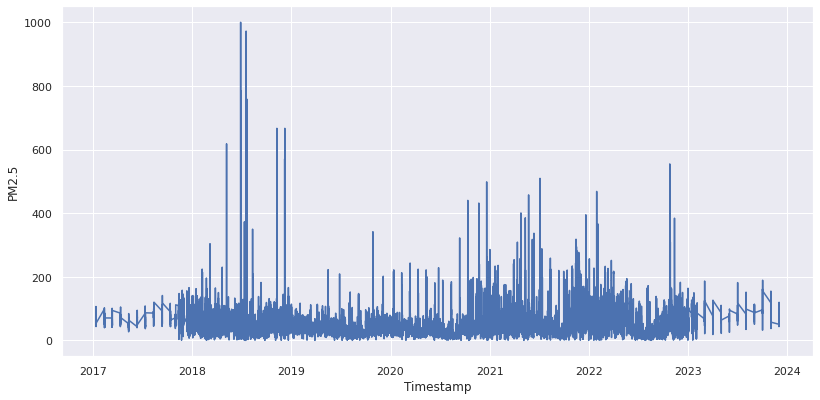

In [88]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=PM25,x='Timestamp',y='PM2.5')
#sns.relplot(data=PM25,x='Timestamp',y='PM2.5',kind="line")
#PM25.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
#plt.xticks(rotation=45)
#plt.xlabel('Years')
#plt.ylabel('µg/m$^3$')
#plt.show()


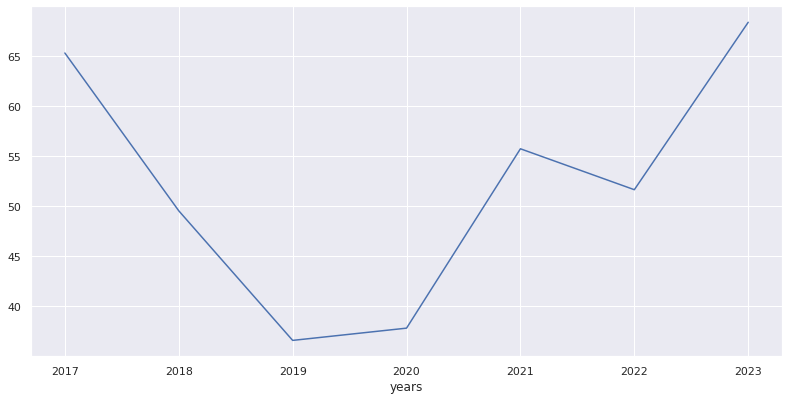

In [145]:
PM25.groupby('years')['PM2.5'].mean().plot()

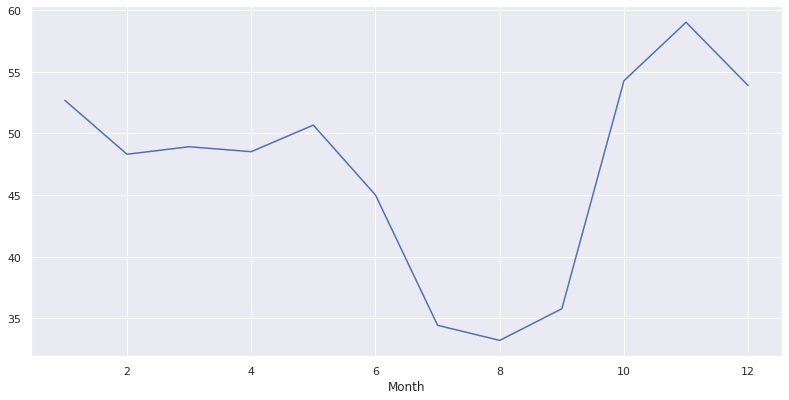

In [146]:
PM25["Month"]=PM25["Timestamp"].dt.month
PM25.groupby('Month')['PM2.5'].mean().plot()

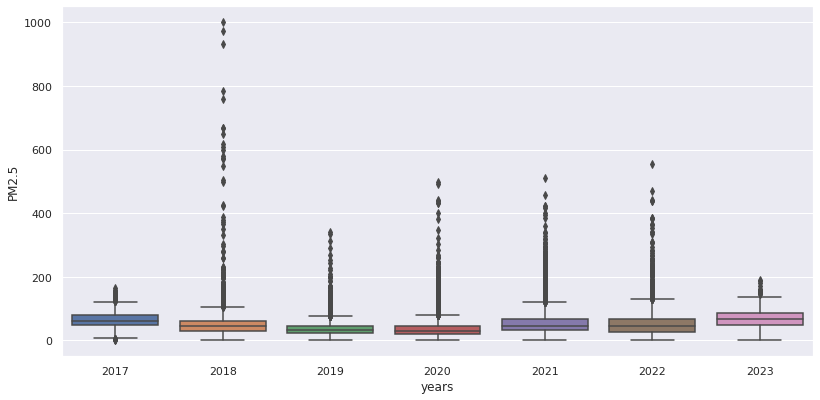

In [147]:
#Boxplot by year
df_year=PM25.loc[:,['years','PM2.5']]
sns.boxplot(x='years', y='PM2.5',data=df_year)
df_name=df_year
for i in df_name['PM2.5']:
  q1=df_name['PM2.5'].quantile(0.25)
  q3=df_name['PM2.5'].quantile(0.75)
  iqr=q3-q1
  lower,upper=q1-1.5*iqr,q3+1.5*iqr

In [148]:
def drop_outliers(df,field_name):
  iqr=1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
  df.drop(df[df[field_name]>(iqr + np.percentile(df[field_name],75))].index,inplace=True)
  df.drop(df[df[field_name]<(np.percentile(df[field_name],25) - iqr)].index,inplace=True)
drop_outliers(df_year,'PM2.5')


In [149]:
# identify outliers
outliers = [x for x in df_name['PM2.5'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df_name['PM2.5'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 0
Non-outlier observations: 44138


In [150]:
df_year.describe().T

,count,mean,std,min,25%,50%,75%,max
years,44138.0,2019.927500,1.530827,2017.00,2019.0000,2020.00,2021.00,2023.00
PM2.5,44138.0,42.219826,22.323084,0.03,25.7125,38.92,55.62,107.61


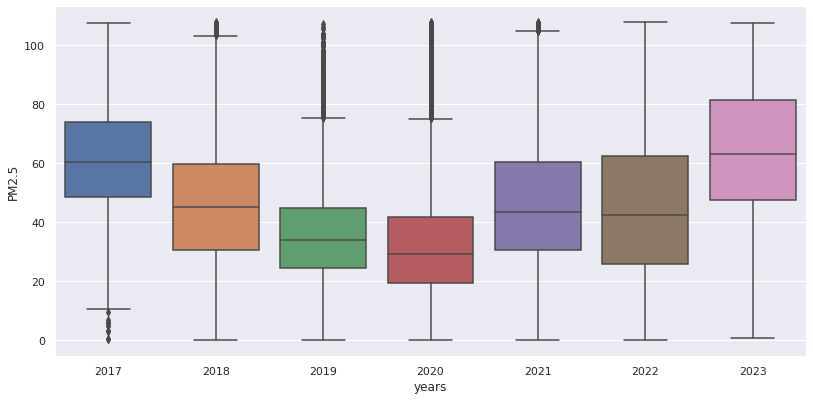

In [151]:
sns.boxplot(x='years', y='PM2.5',data=df_year)

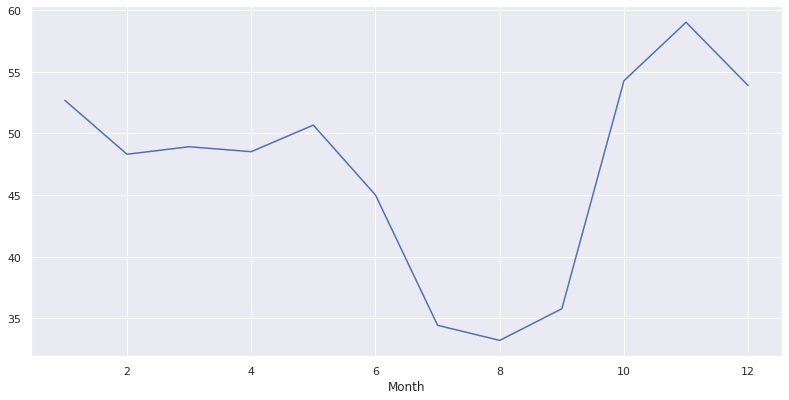

In [152]:
#Time series by month average

PM25.groupby('Month')['PM2.5'].mean().plot()

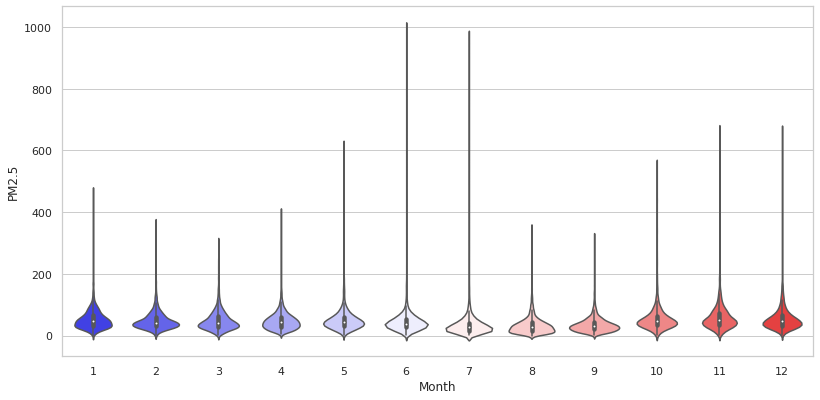

In [153]:
df_month=PM25.loc[:,['Month','PM2.5']]
#sns.boxplot(x='Month', y='PM2.5',data=df_month,palette='bwr')
sns.set_style('whitegrid')
sns.violinplot(x='Month', y='PM2.5',data=df_month,palette='bwr')

In [106]:
df_date=PM25[['PM2.5']]
df_date.shape
df_date.isnull().sum()

PM2.5    0
dtype: int64

In [107]:
def drop_outliers(df,field_name):
  iqr=1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
  df.drop(df[df[field_name]>(iqr + np.percentile(df[field_name],75))].index,inplace=True)
  df.drop(df[df[field_name]<(np.percentile(df[field_name],25) - iqr)].index,inplace=True)
drop_outliers(df_date,'PM2.5')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [109]:
#spliting data
import math

dataset  = df_date.to_numpy()
#dataset=dataset.astype(float)
training_data_len = math.ceil(len(dataset)*.8)
training_data_len
#dataset['pm2.5'].fillna(0, inplace=True)

35311

In [110]:
from sklearn.preprocessing import StandardScaler#PowerTransformer#
sc = MinMaxScaler(feature_range=(0,1))
#sc = PowerTransformer()
#sc= StandardScaler()
scaled_data = sc.fit_transform(dataset)
scaled_data.shape

(44138, 1)

In [111]:
max(dataset)

array([107.61])

In [113]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [114]:
train_data = scaled_data[0:training_data_len, :]
X, Y = to_supervised(train_data)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35307, 1)
X (35307, 4, 1)


In [129]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)
     


X_train (26547, 4, 1)
X_test (8760, 4, 1)
Y_train (26547, 1)
Y_test (8760, 1)


In [130]:
#from sklearn.model_selection import train_test_split
#train, valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.10, random_state=0)

In [131]:
#x_train, y_train = np.array(x_train), np.array(y_train)
#x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [133]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
#Train the model
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
830/830 [==============================] - 14s 11ms/step - loss: 0.0211
Epoch 2/20
830/830 [==============================] - 9s 11ms/step - loss: 0.0125
Epoch 3/20
830/830 [==============================] - 9s 11ms/step - loss: 0.0113
Epoch 4/20
830/830 [==============================] - 8s 10ms/step - loss: 0.0109
Epoch 5/20
830/830 [==============================] - 8s 10ms/step - loss: 0.0104
Epoch 6/20
830/830 [==============================] - 9s 10ms/step - loss: 0.0103
Epoch 7/20
830/830 [==============================] - 8s 10ms/step - loss: 0.0101
Epoch 8/20
830/830 [==============================] - 8s 10ms/step - loss: 0.0100
Epoch 9/20
830/830 [==============================] - 8s 10ms/step - loss: 0.0098
Epoch 10/20
830/830 [==============================] - 8s 10ms/step - loss: 0.0098
Epoch 11/20
830/830 [==============================] - 8s 10ms/step - loss: 0.0097
Epoch 12/20
830/830 [==============================] - 8s 10ms/step - loss: 0.0097
Epoch 13/20


```
model = Sequential()
model.add(LSTM(100,activation='relu', dropout=0.2, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(60, activation='relu',return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


# This is formatted as code
```



In [134]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 50)             10400     
                                                                 
 dropout_6 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 4, 50)             20200     
                                                                 
 dropout_7 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [135]:

#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

274/274 [==============================] - 1s 3ms/step


0.11465345327654429

In [136]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_data.shape)

y_predicted (8760, 1)
X_test (8760, 4, 1)
scaled Values shape (44138, 1)


In [137]:
#Scaling back to the original scale
d = scaled_data[:len(Y_pred),:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:len(Y_pred),1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:len(Y_pred),1:]), axis = 1)
print('concat Y_test', Y_test.shape)
     


dummy (8760, 1)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [138]:
#Take inverse transform
Y_predicted = sc.inverse_transform(Y_predicted)
Y_tested = sc.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [139]:

#Calculate error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

12.334418503490635

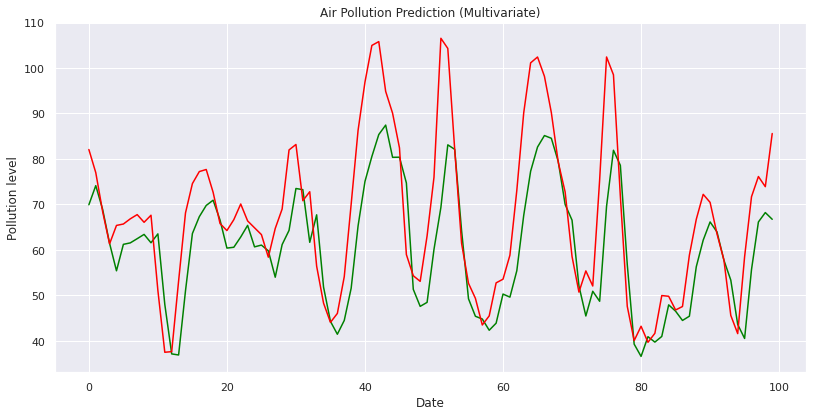

In [143]:
#Plot the graph between actual vs predicted values
plt.plot(Y_predicted[:100,:], color= 'green')
plt.plot(Y_tested[:100,:] , color = 'red')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.show()

In [141]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)
     

MAPE 44.51965858760856


In [142]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 12.334418503490635
Mean of Test data  48.48391324200914


In [154]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
